# Analytic Amplitude Measures

Exploring and comparing to analytic amplitude approaches.

In [63]:
import numpy as np

#
from neurodsp.sim import sim_powerlaw, sim_combined

#
from neurodsp.timefrequency import amp_by_time

#
from neurodsp.plts.time_series import plot_time_series, plot_instantaneous_measure
from neurodsp.spectral import compute_spectrum
from neurodsp.utils import create_times
from neurodsp.filt import filter_signal

# Import FOOOF objects and plotting functions
from fooof import FOOOF
from fooof.bands import Bands
from fooof.plts import plot_spectra

In [64]:
# Set the band definitions to use
bands = Bands({'theta' : [4, 8], 'alpha' : [8, 13], 'beta' : [13, 30]})

In [65]:
def avg_analytic_power(signal, band_def):
    """Helper function to calculate the average analytic power."""
    
    amp_signal = amp_by_time(signal, s_rate, band_def)
    avg_power = np.nanmean(amp_signal)

    return avg_power

In [66]:
n_seconds, s_rate = 10, 1000
osc_freq = 25

In [67]:
times = create_times(n_seconds, s_rate)

## Periodic Change

In [277]:
# Compare signals with an actual change in periodic activity
components = {'sim_powerlaw' : {'exponent' : -1.0, 'f_range' : (2, None)},
              'sim_oscillation' : {'freq' : osc_freq}}
sig_01 = sim_combined(n_seconds, s_rate, components, component_variances=[1, 1])

components = {'sim_powerlaw' : {'exponent' : -1.0, 'f_range' : (2, None)},
              'sim_oscillation' : {'freq' : osc_freq}}
sig_02 = sim_combined(n_seconds, s_rate, components, component_variances=[1, 0.25])

In [273]:
print('{:1.4f}'.format(avg_analytic_power(sig_01, bands.beta)))
print('{:1.4f}'.format(avg_analytic_power(sig_02, bands.beta)))

0.9990
0.6763


In [274]:
f01, p01 = compute_spectrum(sig_01, s_rate)
f02, p02 = compute_spectrum(sig_02, s_rate)

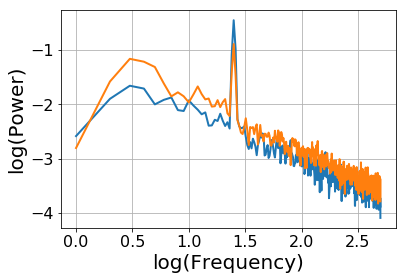

In [275]:
plot_spectra(f01, [p01, p02], log_freqs=True, log_powers=True)

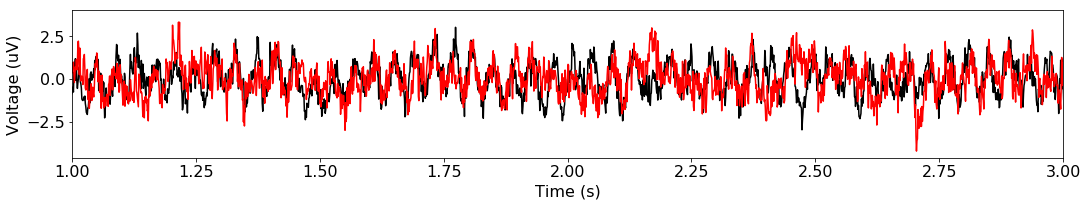

In [276]:
plot_time_series(times, [sig_01, sig_02], xlim=[1, 3])

In [264]:
# plot_instantaneous_measure(times, [filter_signal(sig_02, s_rate, 'bandpass', bands.beta),
#                                    amp_by_time(sig_02, s_rate, bands.beta)],
#                            measure='amplitude', xlim=[1, 3])

## Aperiodic Change, with Periodic Activity

In [214]:
# Compare signals with the same relative oscillation over varying aperiodic component
components = {'sim_powerlaw' : {'exponent' : -1.0, 'f_range' : (1, None)},
              'sim_oscillation' : {'freq' : osc_freq}}
sig_1 = sim_combined(n_seconds, s_rate, components, component_variances=[1, 1])

components = {'sim_powerlaw' : {'exponent' : -1.5, 'f_range' : (1, None)},
              'sim_oscillation' : {'freq' : osc_freq}}
sig_2 = sim_combined(n_seconds, s_rate, components, component_variances=[1, 1])

In [215]:
print('{:1.4f}'.format(avg_analytic_power(sig_1, bands.beta)))
print('{:1.4f}'.format(avg_analytic_power(sig_2, bands.beta)))

0.9845
0.9662


In [216]:
f1, p1 = compute_spectrum(sig_1, s_rate)
f2, p2 = compute_spectrum(sig_2, s_rate)

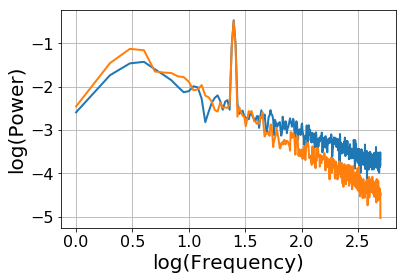

In [217]:
plot_spectra(f1, [p1, p2], log_freqs=True, log_powers=True)

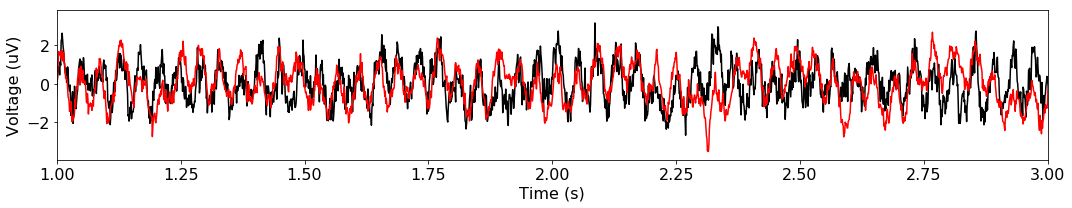

In [218]:
plot_time_series(times, [sig_1, sig_2], xlim=[1, 3])

## Aperiodic Change

In [184]:
# Compare signals with just powerlaw properties
sig_3 = sim_powerlaw(n_seconds, s_rate, exponent=-1.0)
sig_4 = sim_powerlaw(n_seconds, s_rate, exponent=-1.5)

In [185]:
print('{:1.4f}'.format(avg_analytic_power(sig_3, bands.beta)))
print('{:1.4f}'.format(avg_analytic_power(sig_4, bands.beta)))

0.3256
0.1781


In [186]:
f3, p3 = compute_spectrum(sig_3, s_rate)
f4, p4 = compute_spectrum(sig_4, s_rate)

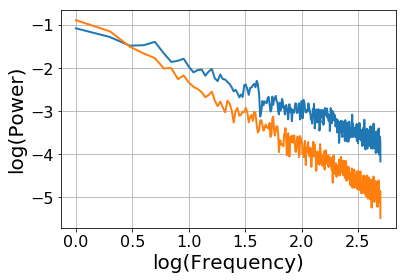

In [187]:
plot_spectra(f1, [p3, p4], log_freqs=True, log_powers=True)